In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset
df = pd.read_csv('creditcard.csv')

In [ ]:
# Data normalization using StandardScaler
scaler = StandardScaler()
df[['Amount', 'Time']] = scaler.fit_transform(df[['Amount', 'Time']])
print('Normalized dataset: \n', df.head())

Normalized dataset: 
        Time        V1        V2        V3        V4        V5        V6  \
0 -1.996583 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1 -1.996583  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2 -1.996562 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3 -1.996562 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4 -1.996541 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   

         V7        V8        V9  ...       V21       V22       V23       V24  \
0  0.239599  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928   
1 -0.078803  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846   
2  0.791461  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281   
3  0.237609  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575   
4  0.592941 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28    A

In [ ]:
# Handling missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
df[['V1', 'V2', 'V3', 'V4', 'V5']] = imputer.fit_transform(df[['V1', 'V2', 'V3', 'V4', 'V5']])
print('Dataset with imputed missing values: \n', df.head())

Dataset with imputed missing values: 
        Time        V1        V2        V3        V4        V5        V6  \
0 -1.996583 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1 -1.996583  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2 -1.996562 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3 -1.996562 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4 -1.996541 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   

         V7        V8        V9  ...       V21       V22       V23       V24  \
0  0.239599  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928   
1 -0.078803  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846   
2  0.791461  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281   
3  0.237609  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575   
4  0.592941 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V

In [ ]:
# Handling outliers using Z-score
z_scores = (df['Amount'] - df['Amount'].mean()) / df['Amount'].std()
df = df[(z_scores < 3)]
print('Dataset with outliers removed: \n', df.head())

Dataset with outliers removed: 
        Time        V1        V2        V3        V4        V5        V6  \
0 -1.996583 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1 -1.996583  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2 -1.996562 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3 -1.996562 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4 -1.996541 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   

         V7        V8        V9  ...       V21       V22       V23       V24  \
0  0.239599  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928   
1 -0.078803  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846   
2  0.791461  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281   
3  0.237609  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575   
4  0.592941 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27    

In [ ]:
# Feature selection using SelectKBest
selector = SelectKBest(f_classif, k=10)
X = df.drop(['Class'], axis=1)
y = df['Class']
X_new = selector.fit_transform(X, y)
print('Selected features: \n', selector.get_support())

Selected features: 
 [False False False  True  True False False  True False False  True  True
  True False  True False  True  True  True False False False False False
 False False False False False False]


In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42, k_neighbors=1)  # Set k_neighbors to a value less than or equal to the number of samples
X_res, y_res = sm.fit_resample(X_new, y)
print('Balanced dataset: \n', pd.concat([pd.DataFrame(X_res), pd.DataFrame(y_res)], axis=1).head())


Balanced dataset: 
           0         1         2         3         4         5         6  \
0  2.536347  1.378155  0.239599  0.090794 -0.551600 -0.617801 -0.311169   
1  0.166480  0.448154 -0.078803 -0.166974  1.612727  1.065235 -0.143772   
2  1.773209  0.379780  0.791461  0.207643  0.624501  0.066084 -0.165946   
3  1.792993 -0.863291  0.237609 -0.054952 -0.226487  0.178228 -0.287924   
4  1.548718  0.403034  0.592941  0.753074 -0.822843  0.538196 -1.119670   

          7         8         9  Class  
0 -0.470401  0.207971  0.025791      0  
1  0.463917 -0.114805 -0.183361      0  
2 -2.890083  1.109969 -0.121359      0  
3 -1.059647 -0.684093  1.965775      0  
4 -0.451449 -0.237033 -0.038195      0  


In [ ]:
# Handling categorical variables using OneHotEncoder
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(df[['Class']])
print('Encoded categorical variables: \n', X_encoded.toarray())

Encoded categorical variables: 
 [[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [ ]:
# Data splitting
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)
print('Training data shape: ', X_train.shape, y_train.shape)
print('Testing data shape: ', X_test.shape, y_test.shape)

Training data shape:  (448400, 10) (448400,)
Testing data shape:  (112100, 10) (112100,)


In [ ]:
# Handling missing values using median imputation
imputer = SimpleImputer(strategy='median')
df[['V6', 'V7', 'V8', 'V9', 'V10']] = imputer.fit_transform(df[['V6', 'V7', 'V8', 'V9', 'V10']])
print('Dataset with imputed missing values: \n', df.head())

Dataset with imputed missing values: 
        Time        V1        V2        V3        V4        V5        V6  \
0 -1.996583 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1 -1.996583  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2 -1.996562 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3 -1.996562 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4 -1.996541 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   

         V7        V8        V9  ...       V21       V22       V23       V24  \
0  0.239599  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928   
1 -0.078803  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846   
2  0.791461  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281   
3  0.237609  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575   
4  0.592941 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V

In [ ]:
# Handling skewed data using logarithmic transformation
df['Amount'] = np.log(df['Amount'] + 0.001)
print('Dataset with logarithmic transformation: \n', df.head())

Dataset with logarithmic transformation: 
        Time        V1        V2        V3        V4        V5        V6  \
0 -1.996583 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1 -1.996583  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2 -1.996562 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3 -1.996562 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4 -1.996541 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   

         V7        V8        V9  ...       V21       V22       V23       V24  \
0  0.239599  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928   
1 -0.078803  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846   
2  0.791461  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281   
3  0.237609  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575   
4  0.592941 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267   

        V25       V26    

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


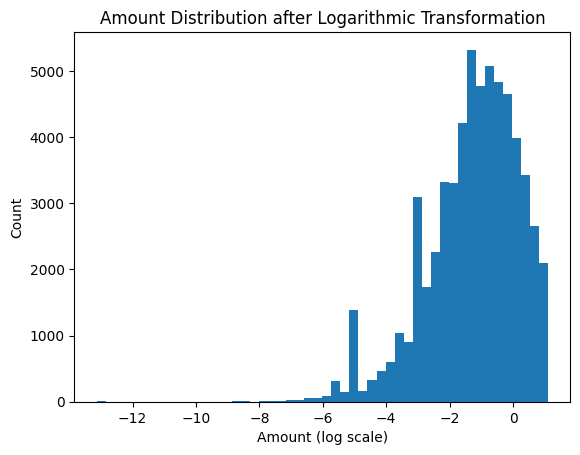

In [ ]:
# Visualize the data distribution after logarithmic transformation
plt.hist(df['Amount'], bins=50)
plt.title('Amount Distribution after Logarithmic Transformation')
plt.xlabel('Amount (log scale)')
plt.ylabel('Count')
plt.show()

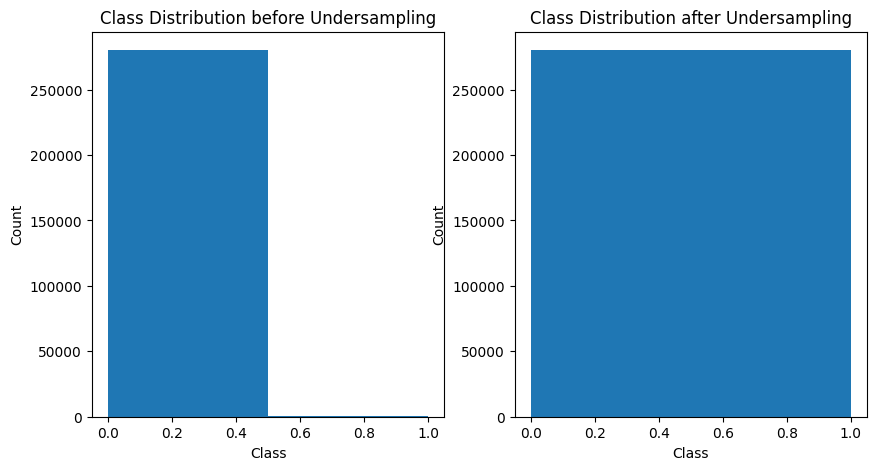

In [ ]:
# Visualize the data distribution before and after random undersampling
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].hist(y, bins=2)
axs[0].set_title('Class Distribution before Undersampling')
axs[0].set_xlabel('Class')
axs[0].set_ylabel('Count')
axs[1].hist(y_res, bins=2)
axs[1].set_title('Class Distribution after Undersampling')
axs[1].set_xlabel('Class')
axs[1].set_ylabel('Count')
plt.show()